<h1>Data Science as a Career: What's in it for You?</h1>

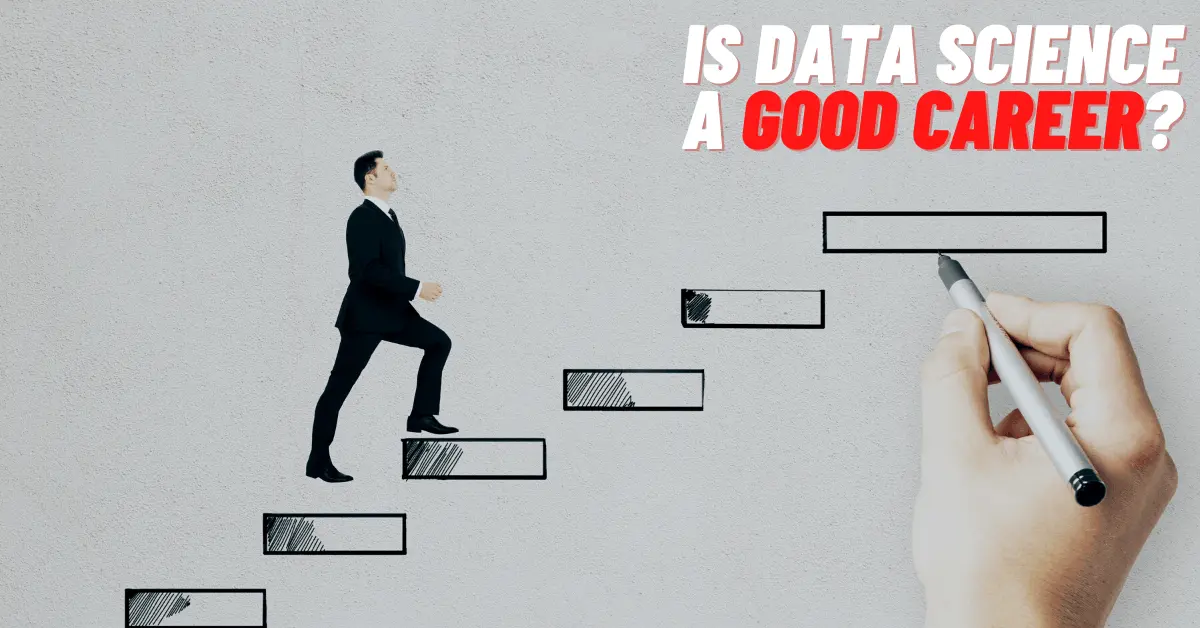

<h3>Table of Contents</h3>

<ul>
    <li>Introduction</li>
    <li>Exploratory Data Analysis</li>
    <li>Results</li>
    </ul>

<h3>Introduction</h3>

For this project, the Stackoverflow 2017 survey dataset has been used. Kaggle link: https://www.kaggle.com/stackoverflow/so-survey-2017. CRISP-DM methodology has been employed for analysis, which comprises the following steps:-
<ol>
    <li>Business Understanding</li>
    <li>Data Understanding</li>
    <li>Data Preprocessing</li>
    <li>Data Modelling</li>
    <li>Evaluating the Results</li>
    <li>Deployment</li>
</ol><br>
Questions that have been answered in this noteboook:-
<ol>
    <li>What is the Job/Career Satisfaction for Data Scientists?</li>
    <li>What kind of Salary do Data Scientists get?</li>
    <li>What are the key technologies that Data Scientists work with></li>
    <li>Can you become a Data Scientist></li>
</ol>

The last question has been addressed in the other notebook in my github repository, which contains a model which predicts whether one can become a Data Scientist or not.

<h3>Motivation</h3>

I have been hearing all the hype about Data Science and how cool Data Scientists are, since I was in my first year of University, . I never really understood the real reason behind the hype, until my last year of Uni, when I started learning about Data Science and did a few courses. I took up Data Science electives in Uni and I got a Data Science oriented internship as well. It wasn't long before I got hooked on to it.<br>
I'm in my last year of University right now and I'm going to start my first job ever in about a month (which is also Data Science oriented), and I'm still wondering whether this is the Career I really want. When I was going through the StackOverflow dataset, I was able to find information about developers from various fields of study including Data Science. So, I felt like I've got a chance to find the answer to my questions, and hence came the idea for this project.<br><br>
Naysayers say that this hype is just hype. Let's find out today.

<h3>Business Understanding</h3>

Many of my friends and colleagues call themselves <i>"Data Science enthusiasts"</i>, but none of them are sure whether it's the right decision to take. So by analyzing Key features like Job/Career Satisfaction, Salary, skills, education etc that real Data Scientists have, we can get a clear picture about this field. The dataset used here has a few columns which when utilised properly can highlight many of these features.

<h3>Exploratory Data Analysis</h3><br>
    <b>Data Understanding & Preprocessing</b>

In [211]:
#libraries
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
#input
data = pd.read_csv(r"C:\Users\utkar\Downloads\Udacity project Dataset\Stack Overflow\survey_results_public.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

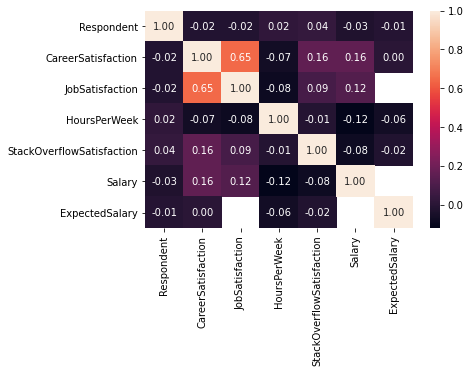

In [213]:
#Understanding the correlation between different columns
sns.heatmap(data.corr(), annot = True, fmt = ".2f")

<strong>As seen above, Salary and CareerSatisfaction show good correlation</strong>

In [214]:
df1 = data[['DeveloperType', 'JobSatisfaction',
          'CareerSatisfaction', 'EducationTypes',
          'HaveWorkedFramework', 'HaveWorkedLanguage','HaveWorkedDatabase', 'HaveWorkedPlatform','FormalEducation', 'MajorUndergrad', 'Salary']]
df1 = df1.dropna(subset = ['DeveloperType']) #dropping null values in DeveloperType because we want to find values related to DataScientist. So if that value is null then we don't have any use for that row, and we can't replace it with another value too
df1 = df1.reset_index()
df1.head()

,index,DeveloperType,JobSatisfaction,CareerSatisfaction,EducationTypes,HaveWorkedFramework,HaveWorkedLanguage,HaveWorkedDatabase,HaveWorkedPlatform,FormalEducation,MajorUndergrad,Salary
0,2,Other,9.0,8.0,Self-taught; Coding competition; Hackathon; Op...,NaN,Java; PHP; Python,MySQL,NaN,Bachelor's degree,Computer science or software engineering,113750.0
1,4,Mobile developer; Graphics programming; Deskto...,8.0,6.0,NaN,NaN,NaN,NaN,NaN,Master's degree,Computer science or software engineering,NaN
2,7,Web developer,7.0,7.0,Online course; On-the-job training; Self-taugh...,React,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Redis; MySQL; PostgreSQL,Amazon Web Services (AWS),Master's degree,Computer science or software engineering,NaN
3,8,Web developer; Mobile developer,6.0,6.0,NaN,AngularJS; Node.js; .NET Core,C#; JavaScript,SQL Server,Android; Microsoft Azure,Bachelor's degree,Computer science or software engineering,NaN
4,9,Mobile developer; Desktop applications developer,8.0,6.0,Self-taught; Open source contributions,NaN,Objective-C; Swift,PostgreSQL,iOS; Amazon Web Services (AWS),Master's degree,Computer science or software engineering,NaN


In [215]:
how_df = df1.drop(['index'], axis = 1)
how_df #This is the final preprocessed data table

,DeveloperType,JobSatisfaction,CareerSatisfaction,EducationTypes,HaveWorkedFramework,HaveWorkedLanguage,HaveWorkedDatabase,HaveWorkedPlatform,FormalEducation,MajorUndergrad,Salary
0,Other,9.0,8.0,Self-taught; Coding competition; Hackathon; Op...,NaN,Java; PHP; Python,MySQL,NaN,Bachelor's degree,Computer science or software engineering,113750.0
1,Mobile developer; Graphics programming; Deskto...,8.0,6.0,NaN,NaN,NaN,NaN,NaN,Master's degree,Computer science or software engineering,NaN
2,Web developer,7.0,7.0,Online course; On-the-job training; Self-taugh...,React,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Redis; MySQL; PostgreSQL,Amazon Web Services (AWS),Master's degree,Computer science or software engineering,NaN
3,Web developer; Mobile developer,6.0,6.0,NaN,AngularJS; Node.js; .NET Core,C#; JavaScript,SQL Server,Android; Microsoft Azure,Bachelor's degree,Computer science or software engineering,NaN
4,Mobile developer; Desktop applications developer,8.0,6.0,Self-taught; Open source contributions,NaN,Objective-C; Swift,PostgreSQL,iOS; Amazon Web Services (AWS),Master's degree,Computer science or software engineering,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36120,Web developer,5.0,7.0,On-the-job training; Self-taught,NaN,JavaScript,NaN,SharePoint,Bachelor's degree,Computer programming or Web development,NaN
36121,Web developer; Mobile developer; Developer wit...,4.0,7.0,Self-taught; Open source contributions,AngularJS; Node.js; React; .NET Core,C++; C#; Java; JavaScript; PHP; SQL,MongoDB; Redis; SQL Server; MySQL; Oracle; SQLite,Android; Windows Desktop; Linux Desktop,Some college/university study without earning ...,Something else,NaN
36122,Web developer; Developer with a statistics or ...,3.0,7.0,Online course; Self-taught; Coding competition,Cordova; .NET Core,C#; JavaScript; Python; SQL; VB.NET; VBA,SQL Server,Windows Desktop,Bachelor's degree,A social science,58000.0
36123,Web developer; Systems administrator,10.0,10.0,Self-taught; Coding competition,NaN,NaN,NaN,NaN,Some college/university study without earning ...,"Information technology, networking, or system ...",NaN


<strong>Finding percentage of Data Scientists in this survey<strong>

In [216]:
devtype_df = data[['DeveloperType']]
#devtype_df.info()
df = devtype_df.dropna()
df = df.reset_index()
df.head()

,index,DeveloperType
0,2,Other
1,4,Mobile developer; Graphics programming; Deskto...
2,7,Web developer
3,8,Web developer; Mobile developer
4,9,Mobile developer; Desktop applications developer


In [217]:
#Blacklist has all different types of Developers in this survey
Blacklist = set()
for sentences in df['DeveloperType']:
    sentence = sentences.split(';')
    for word in sentence:
        if word != 'nan':
            word = word.strip()
            #print(word)
            Blacklist.add(word)
print(Blacklist)

{'Developer with a statistics or mathematics background', 'Graphic designer', 'Graphics programming', 'DevOps specialist', 'Other', 'Desktop applications developer', 'Database administrator', 'Quality assurance engineer', 'Mobile developer', 'Data scientist', 'Systems administrator', 'Web developer', 'Embedded applications/devices developer', 'Machine learning specialist'}


In [218]:
#Creating a new DataFrame with each DeveloperType having its own Count
new_df = defaultdict(int)
for i in range(df.shape[0]):
    sentence = df['DeveloperType'][i].split(';')
    for word in sentence:
        word = word.strip()
        if word in Blacklist:
            new_df[word] += 1
            #print(new_df[word])
new_df1 = pd.DataFrame(pd.Series(new_df).reset_index())
new_df1.columns = ['Developer', 'count']
new_df1.sort_values('count', ascending = False, inplace = True)
new_df1['Percentage'] = new_df1['count']/new_df1['count'].sum()*100
new_df1

,Developer,count,Percentage
4,Web developer,26235,33.957209
3,Desktop applications developer,10435,13.506517
1,Mobile developer,8326,10.776738
11,Database administrator,5192,6.720253
10,Developer with a statistics or mathematics bac...,4091,5.295176
12,Systems administrator,4086,5.288704
6,DevOps specialist,4015,5.196806
5,Embedded applications/devices developer,3352,4.338653
8,Data scientist,3045,3.941288
0,Other,2694,3.486972


<strong>Number of Data Scientists is 3.94% out of all the people who took the survey, which implies that either Data Science is less popular or very difficult<strong>

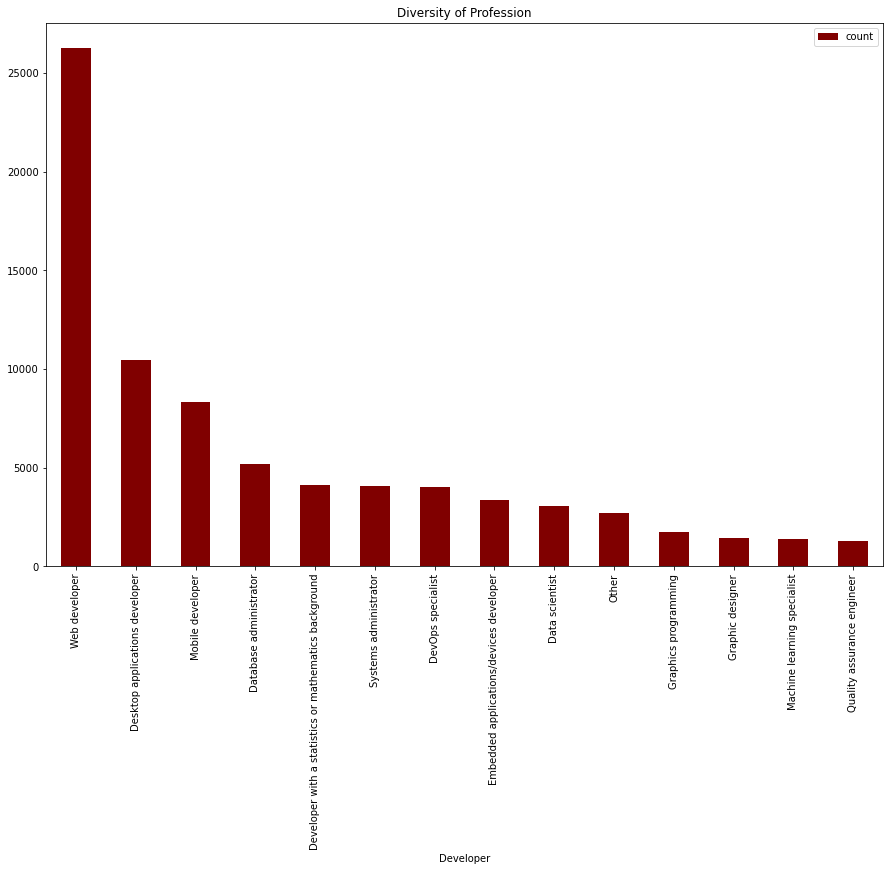

In [219]:
new_df1.plot.bar(x='Developer', y='count', title="Diversity of Profession", figsize = (15,10), color = 'Maroon');

<strong>Creating a DataFrame with only those rows which have a DataScientist in DeveloperType<strong>

In [220]:
how_df

,DeveloperType,JobSatisfaction,CareerSatisfaction,EducationTypes,HaveWorkedFramework,HaveWorkedLanguage,HaveWorkedDatabase,HaveWorkedPlatform,FormalEducation,MajorUndergrad,Salary
0,Other,9.0,8.0,Self-taught; Coding competition; Hackathon; Op...,NaN,Java; PHP; Python,MySQL,NaN,Bachelor's degree,Computer science or software engineering,113750.0
1,Mobile developer; Graphics programming; Deskto...,8.0,6.0,NaN,NaN,NaN,NaN,NaN,Master's degree,Computer science or software engineering,NaN
2,Web developer,7.0,7.0,Online course; On-the-job training; Self-taugh...,React,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Redis; MySQL; PostgreSQL,Amazon Web Services (AWS),Master's degree,Computer science or software engineering,NaN
3,Web developer; Mobile developer,6.0,6.0,NaN,AngularJS; Node.js; .NET Core,C#; JavaScript,SQL Server,Android; Microsoft Azure,Bachelor's degree,Computer science or software engineering,NaN
4,Mobile developer; Desktop applications developer,8.0,6.0,Self-taught; Open source contributions,NaN,Objective-C; Swift,PostgreSQL,iOS; Amazon Web Services (AWS),Master's degree,Computer science or software engineering,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36120,Web developer,5.0,7.0,On-the-job training; Self-taught,NaN,JavaScript,NaN,SharePoint,Bachelor's degree,Computer programming or Web development,NaN
36121,Web developer; Mobile developer; Developer wit...,4.0,7.0,Self-taught; Open source contributions,AngularJS; Node.js; React; .NET Core,C++; C#; Java; JavaScript; PHP; SQL,MongoDB; Redis; SQL Server; MySQL; Oracle; SQLite,Android; Windows Desktop; Linux Desktop,Some college/university study without earning ...,Something else,NaN
36122,Web developer; Developer with a statistics or ...,3.0,7.0,Online course; Self-taught; Coding competition,Cordova; .NET Core,C#; JavaScript; Python; SQL; VB.NET; VBA,SQL Server,Windows Desktop,Bachelor's degree,A social science,58000.0
36123,Web developer; Systems administrator,10.0,10.0,Self-taught; Coding competition,NaN,NaN,NaN,NaN,Some college/university study without earning ...,"Information technology, networking, or system ...",NaN


In [221]:
#creating an empty DataFrame with the same columns as how_df
only_DS = pd.DataFrame(columns = how_df.columns)
only_DS.head()

,DeveloperType,JobSatisfaction,CareerSatisfaction,EducationTypes,HaveWorkedFramework,HaveWorkedLanguage,HaveWorkedDatabase,HaveWorkedPlatform,FormalEducation,MajorUndergrad,Salary


In [222]:
#only_DS = pd.DataFrame(columns = how_df.columns)
for i in range(how_df.shape[0]):
    sentence = how_df['DeveloperType'][i].split(';')
    for word in sentence:
        word = word.strip()
        if word == "Data scientist":
            #print(word)
            only_DS.loc[len(only_DS.index)] = how_df.loc[i]
            only_DS.reset_index()
only_DS

,DeveloperType,JobSatisfaction,CareerSatisfaction,EducationTypes,HaveWorkedFramework,HaveWorkedLanguage,HaveWorkedDatabase,HaveWorkedPlatform,FormalEducation,MajorUndergrad,Salary
0,Data scientist; Other,8.0,8.0,On-the-job training; Self-taught,NaN,Perl; Python,MySQL,NaN,Doctoral degree,A natural science,NaN
1,Web developer; Mobile developer; Data scientis...,NaN,7.0,Online course; Industry certification; On-the-...,.NET Core,C++; C#; Java; JavaScript; Python; Ruby; SQL; ...,MongoDB; SQL Server; MySQL; PostgreSQL; Oracle...,Android; Linux Desktop; Amazon Web Services (AWS),Master's degree,Something else,NaN
2,Web developer; Mobile developer; Data scientis...,8.0,7.0,NaN,AngularJS; Node.js; .NET Core,C++; C#; JavaScript; SQL,SQL Server,Windows Phone; Windows Desktop; Microsoft Azure,Bachelor's degree,Fine arts or performing arts,NaN
3,Machine learning specialist; Developer with a ...,NaN,4.0,On-the-job training; Self-taught; Coding compe...,Node.js; Cordova,CoffeeScript; Haskell; JavaScript; Python; SQL,MongoDB; Redis; PostgreSQL,Windows Desktop; Linux Desktop; Amazon Web Ser...,Master's degree,Computer science or software engineering,NaN
4,Web developer; Mobile developer; Data scientis...,5.0,9.0,NaN,NaN,CoffeeScript; JavaScript; Objective-C; PHP; Py...,Redis; MySQL,iOS; Mac OS; Arduino; Raspberry Pi; Amazon Web...,Primary/elementary school,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3040,Data scientist; Desktop applications developer,8.0,9.0,NaN,NaN,C++; Java,MongoDB; PostgreSQL; Oracle,NaN,Master's degree,Computer engineering or electrical/electronics...,105400.0
3041,Web developer; Data scientist; Quality assuran...,7.0,7.0,On-the-job training; Self-taught; Coding compe...,Node.js,Assembly; Clojure; JavaScript; Python; Scala; SQL,MongoDB; MySQL; SQLite,NaN,Secondary school,NaN,NaN
3042,Machine learning specialist; Developer with a ...,5.0,8.0,Self-taught,NaN,C++,NaN,Windows Desktop,Doctoral degree,A non-computer-focused engineering discipline,NaN
3043,Web developer; Mobile developer; Embedded appl...,0.0,0.0,Bootcamp; Part-time/evening course; Industry c...,NaN,NaN,NaN,NaN,Doctoral degree,Something else,NaN


Above is the table with all the DeveloperType values having Data Scientist 

In [223]:
only_DS['CareerSatisfaction'].value_counts()

8.0     762
7.0     601
10.0    516
9.0     442
6.0     270
5.0     190
4.0      85
3.0      61
0.0      35
2.0      27
1.0      20
Name: CareerSatisfaction, dtype: int64

As shown above, most of the Data Scientists have higher Career Satisfaction

Calculating average CareerSatisfaction for Data Scientists

In [224]:
avg_df = pd.DataFrame(only_DS['CareerSatisfaction'].value_counts())
avg_df = avg_df.reset_index().sort_values(['index'])
avg_df.columns = ['CareerSatisfaction', 'Count']
avg_df['Percentage'] = avg_df['Count']/avg_df['Count'].sum()*100
avg_df

,CareerSatisfaction,Count,Percentage
8,0.0,35,1.163177
10,1.0,20,0.664673
9,2.0,27,0.897308
7,3.0,61,2.027252
6,4.0,85,2.824859
5,5.0,190,6.314390
4,6.0,270,8.973081
1,7.0,601,19.973413
0,8.0,762,25.324028
3,9.0,442,14.689266


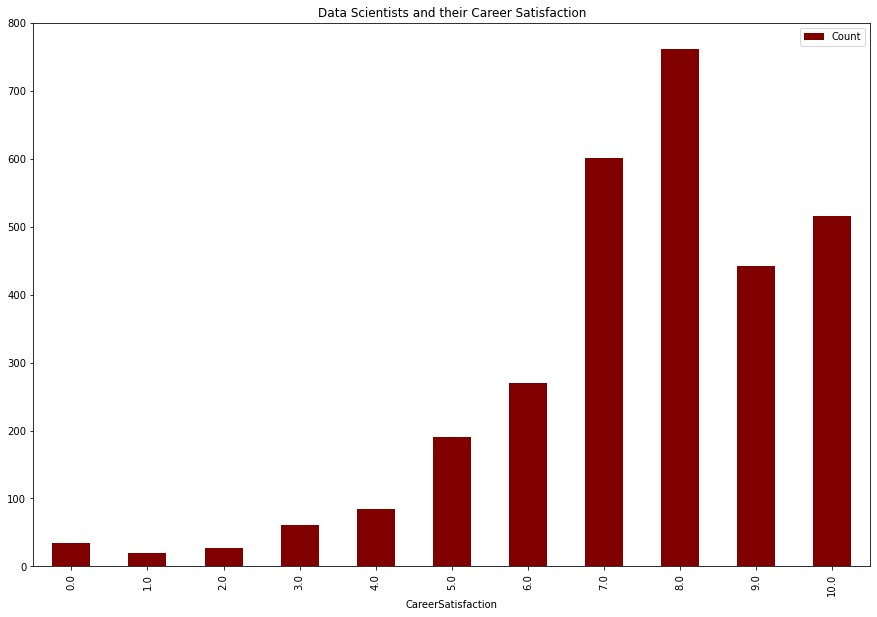

In [225]:
avg_df.plot.bar(x='CareerSatisfaction', y='Count', title="Data Scientists and their Career Satisfaction", figsize = (15,10), color = ['maroon']);

In [226]:
avg_df[avg_df['CareerSatisfaction']>6.0]['Percentage'].sum()

77.13526088401461

As shown above, 77.13% of the Data Scientists have Career Satisfaction more than 6.0, which is pretty decent

In [227]:
#x1 = (0*70 + 1*40 + 2*54 + 3*122 + 4*170 + 5*380 + 6*540 + 7*1202 + 8*1524 + 9*884 + 10*1032)/(70+40+54+122+170+380+540+1202+1524+884+1032)
sum = int()
tot = int()
for i in range(avg_df.shape[0]):
    sum += avg_df['CareerSatisfaction'][i]*avg_df['Count'][i]
tot = avg_df['Count'].sum()
x = sum/tot
print(x)

7.51345962113659


<strong>Data Scientists have average Career Satisfaction as 7.5<strong>

In [228]:
only_DS_Sat = only_DS[['JobSatisfaction','CareerSatisfaction']]
only_DS_Sat.head()
only_DS_Sat.info()
only_DS_Sat[only_DS_Sat['JobSatisfaction'].isnull() == True] #The output shows that there are 308 null values of JobSatisfaction

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3044
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JobSatisfaction     2891 non-null   float64
 1   CareerSatisfaction  3009 non-null   float64
dtypes: float64(2)
memory usage: 71.4 KB


,JobSatisfaction,CareerSatisfaction
1,NaN,7.0
3,NaN,4.0
19,NaN,6.0
21,NaN,1.0
27,NaN,NaN
...,...,...
2960,NaN,3.0
2969,NaN,0.0
3004,NaN,7.0
3014,NaN,0.0


In [229]:
only_DS

,DeveloperType,JobSatisfaction,CareerSatisfaction,EducationTypes,HaveWorkedFramework,HaveWorkedLanguage,HaveWorkedDatabase,HaveWorkedPlatform,FormalEducation,MajorUndergrad,Salary
0,Data scientist; Other,8.0,8.0,On-the-job training; Self-taught,NaN,Perl; Python,MySQL,NaN,Doctoral degree,A natural science,NaN
1,Web developer; Mobile developer; Data scientis...,NaN,7.0,Online course; Industry certification; On-the-...,.NET Core,C++; C#; Java; JavaScript; Python; Ruby; SQL; ...,MongoDB; SQL Server; MySQL; PostgreSQL; Oracle...,Android; Linux Desktop; Amazon Web Services (AWS),Master's degree,Something else,NaN
2,Web developer; Mobile developer; Data scientis...,8.0,7.0,NaN,AngularJS; Node.js; .NET Core,C++; C#; JavaScript; SQL,SQL Server,Windows Phone; Windows Desktop; Microsoft Azure,Bachelor's degree,Fine arts or performing arts,NaN
3,Machine learning specialist; Developer with a ...,NaN,4.0,On-the-job training; Self-taught; Coding compe...,Node.js; Cordova,CoffeeScript; Haskell; JavaScript; Python; SQL,MongoDB; Redis; PostgreSQL,Windows Desktop; Linux Desktop; Amazon Web Ser...,Master's degree,Computer science or software engineering,NaN
4,Web developer; Mobile developer; Data scientis...,5.0,9.0,NaN,NaN,CoffeeScript; JavaScript; Objective-C; PHP; Py...,Redis; MySQL,iOS; Mac OS; Arduino; Raspberry Pi; Amazon Web...,Primary/elementary school,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3040,Data scientist; Desktop applications developer,8.0,9.0,NaN,NaN,C++; Java,MongoDB; PostgreSQL; Oracle,NaN,Master's degree,Computer engineering or electrical/electronics...,105400.0
3041,Web developer; Data scientist; Quality assuran...,7.0,7.0,On-the-job training; Self-taught; Coding compe...,Node.js,Assembly; Clojure; JavaScript; Python; Scala; SQL,MongoDB; MySQL; SQLite,NaN,Secondary school,NaN,NaN
3042,Machine learning specialist; Developer with a ...,5.0,8.0,Self-taught,NaN,C++,NaN,Windows Desktop,Doctoral degree,A non-computer-focused engineering discipline,NaN
3043,Web developer; Mobile developer; Embedded appl...,0.0,0.0,Bootcamp; Part-time/evening course; Industry c...,NaN,NaN,NaN,NaN,Doctoral degree,Something else,NaN


<AxesSubplot:>

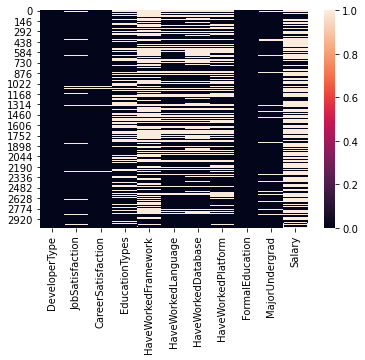

In [230]:
sns.heatmap(only_DS.isnull()) #This heatmap shows how many null values are there. "Salary" and "HaveWorkedFramework" are the ones with most missing values

In [231]:
only_DS = only_DS.drop(['HaveWorkedFramework'], axis = 1)
#sns.heatmap(only_DS1.isnull())
only_DS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3044
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DeveloperType       3045 non-null   object 
 1   JobSatisfaction     2891 non-null   float64
 2   CareerSatisfaction  3009 non-null   float64
 3   EducationTypes      1841 non-null   object 
 4   HaveWorkedLanguage  2260 non-null   object 
 5   HaveWorkedDatabase  1982 non-null   object 
 6   HaveWorkedPlatform  1900 non-null   object 
 7   FormalEducation     3045 non-null   object 
 8   MajorUndergrad      2794 non-null   object 
 9   Salary              945 non-null    float64
dtypes: float64(3), object(7)
memory usage: 261.7+ KB


<strong>Finding the relationship between Salary and Data Science Jobs</strong>

In [232]:
sal_df = only_DS.dropna(subset = ['Salary'], axis = 0)
sal_df

,DeveloperType,JobSatisfaction,CareerSatisfaction,EducationTypes,HaveWorkedLanguage,HaveWorkedDatabase,HaveWorkedPlatform,FormalEducation,MajorUndergrad,Salary
8,Web developer; Graphics programming; Developer...,4.0,5.0,Self-taught; Coding competition; Hackathon; Op...,C++; C#; F#; Haskell; Python; SQL,SQL Server,Windows Desktop; Arduino; Raspberry Pi,Bachelor's degree,Computer science or software engineering,43750.000000
9,Machine learning specialist; Data scientist,10.0,10.0,Self-taught,C#; Java; JavaScript; Python; Scala; SQL; VBA,Redis; SQL Server,Amazon Web Services (AWS); Microsoft Azure,Some college/university study without earning ...,Computer science or software engineering,51282.051282
10,Web developer; Data scientist,6.0,6.0,On-the-job training; Self-taught,C#; Java; JavaScript; Python; Ruby; Scala; SQL,MongoDB; Redis; SQL Server; MySQL; PostgreSQL;...,NaN,Some college/university study without earning ...,Computer science or software engineering,25000.000000
13,Graphics programming; Developer with a statist...,10.0,10.0,On-the-job training; Self-taught,C++; Matlab; Python; R; VBA,MySQL; SQLite,Windows Desktop; Linux Desktop,Master's degree,A non-computer-focused engineering discipline,81000.000000
22,Web developer; Data scientist; Systems adminis...,6.0,7.0,Online course; Industry certification; Self-ta...,Java; JavaScript; SQL,SQL Server; MySQL,Windows Desktop; Arduino; SharePoint,Secondary school,NaN,40000.000000
...,...,...,...,...,...,...,...,...,...,...
3030,Web developer; Machine learning specialist; De...,7.0,6.0,Part-time/evening course; Self-taught; Coding ...,Elixir; JavaScript; PHP; SQL; TypeScript,SQL Server; MySQL; SQLite,Windows Desktop; Linux Desktop; Mac OS; WordPress,Bachelor's degree,"Information technology, networking, or system ...",336.549248
3032,Data scientist,5.0,6.0,Online course; Self-taught; Coding competition,C; C#; Java; JavaScript; Python; R; Scala; SQL,Cassandra; MongoDB; Redis; MySQL; PostgreSQL; ...,Windows Desktop; Linux Desktop; Amazon Web Ser...,Bachelor's degree,"Information technology, networking, or system ...",7634.708560
3033,Data scientist,10.0,10.0,Open source contributions,C,Cassandra,Amazon Web Services (AWS),I never completed any formal education,NaN,75757.575758
3034,Data scientist; Database administrator,6.0,10.0,NaN,Groovy; JavaScript; PHP; SQL,Oracle,Amazon Web Services (AWS),Master's degree,Computer science or software engineering,67354.838710


In [233]:
sal_df[['Salary']]

,Salary
8,43750.000000
9,51282.051282
10,25000.000000
13,81000.000000
22,40000.000000
...,...
3030,336.549248
3032,7634.708560
3033,75757.575758
3034,67354.838710


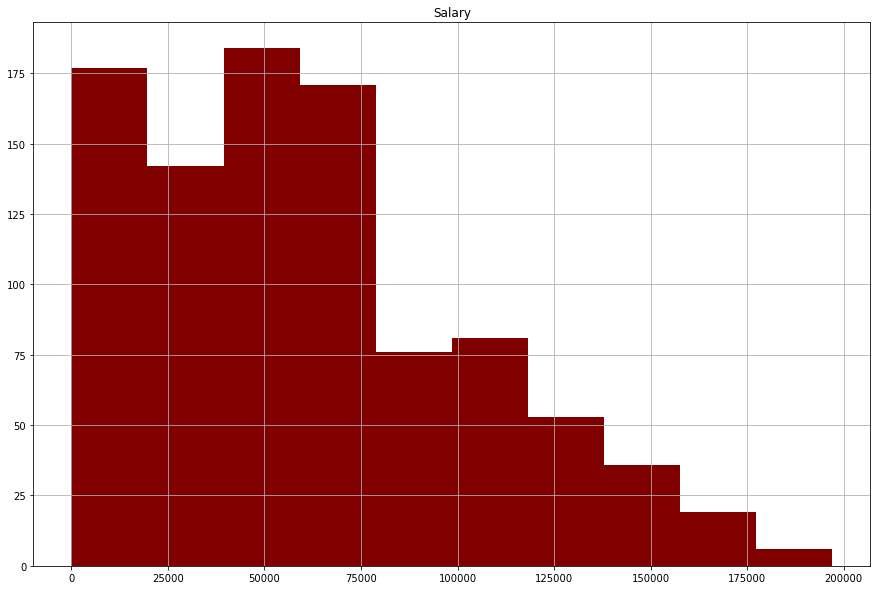

In [234]:
sal_df[['Salary']].hist(figsize = (15,10), color = 'Maroon');

In [235]:
print(sal_df[['Salary']].mean())

Salary    61137.33446
dtype: float64


In [236]:
sal_df[sal_df['Salary'] > 100000][['Salary']].shape[0]/sal_df.shape[0]

0.19047619047619047

<strong>It is evident from the above histogram that most of the Data Scientists have salaries below 75000, with average salary being 61137. However more than 50% of the Salary had missing values which had to be dropped, so this result is not very reliable
    
Also, 19% of the Data Scientists have a Salary higher than 100000
</strong>

In [237]:
only_DS = only_DS.drop(['Salary'], axis = 1)

<strong>Now we will try to find what kind of Education do most Data Scientists have. This can be used as an indication for a Data Science student to pursue the same kind of Education</strong>

We will try to create a separate column for every Education Type separated by the ';'

In [238]:
only_DS[['EducationTypes']]

,EducationTypes
0,On-the-job training; Self-taught
1,Online course; Industry certification; On-the-...
2,NaN
3,On-the-job training; Self-taught; Coding compe...
4,NaN
...,...
3040,NaN
3041,On-the-job training; Self-taught; Coding compe...
3042,Self-taught
3043,Bootcamp; Part-time/evening course; Industry c...


In [239]:
#Removing null values from EducationTypes, since we can't replace them with any concrete value
only_DS_edu = only_DS.dropna(subset = ['EducationTypes'], axis = 0)
only_DS_edu

,DeveloperType,JobSatisfaction,CareerSatisfaction,EducationTypes,HaveWorkedLanguage,HaveWorkedDatabase,HaveWorkedPlatform,FormalEducation,MajorUndergrad
0,Data scientist; Other,8.0,8.0,On-the-job training; Self-taught,Perl; Python,MySQL,NaN,Doctoral degree,A natural science
1,Web developer; Mobile developer; Data scientis...,NaN,7.0,Online course; Industry certification; On-the-...,C++; C#; Java; JavaScript; Python; Ruby; SQL; ...,MongoDB; SQL Server; MySQL; PostgreSQL; Oracle...,Android; Linux Desktop; Amazon Web Services (AWS),Master's degree,Something else
3,Machine learning specialist; Developer with a ...,NaN,4.0,On-the-job training; Self-taught; Coding compe...,CoffeeScript; Haskell; JavaScript; Python; SQL,MongoDB; Redis; PostgreSQL,Windows Desktop; Linux Desktop; Amazon Web Ser...,Master's degree,Computer science or software engineering
5,Machine learning specialist; Data scientist; O...,8.0,7.0,Online course; On-the-job training; Self-taugh...,NaN,NaN,NaN,I prefer not to answer,NaN
6,Web developer; Developer with a statistics or ...,8.0,8.0,On-the-job training; Self-taught; Open source ...,C++,NaN,NaN,Bachelor's degree,A natural science
...,...,...,...,...,...,...,...,...,...
3039,Web developer; Data scientist; Database admini...,7.0,9.0,Self-taught,C++; Java; JavaScript; SQL,MySQL; PostgreSQL,Windows Desktop; Linux Desktop,Bachelor's degree,A non-computer-focused engineering discipline
3041,Web developer; Data scientist; Quality assuran...,7.0,7.0,On-the-job training; Self-taught; Coding compe...,Assembly; Clojure; JavaScript; Python; Scala; SQL,MongoDB; MySQL; SQLite,NaN,Secondary school,NaN
3042,Machine learning specialist; Developer with a ...,5.0,8.0,Self-taught,C++,NaN,Windows Desktop,Doctoral degree,A non-computer-focused engineering discipline
3043,Web developer; Mobile developer; Embedded appl...,0.0,0.0,Bootcamp; Part-time/evening course; Industry c...,NaN,NaN,NaN,Doctoral degree,Something else


In [240]:
Blacklist = set() #Blacklist is the set of all different Education Types
for sentences in only_DS_edu['EducationTypes']:
    sentence = sentences.split(';')
    for word in sentence:
        if word != 'nan':
            word = word.strip()
            #print(word)
            Blacklist.add(word)
print(Blacklist)

{'Online course', 'Part-time/evening course', 'Self-taught', 'Bootcamp', 'Industry certification', 'Coding competition', 'On-the-job training', 'Hackathon', 'Open source contributions'}


In [241]:
only_DS_edu

,DeveloperType,JobSatisfaction,CareerSatisfaction,EducationTypes,HaveWorkedLanguage,HaveWorkedDatabase,HaveWorkedPlatform,FormalEducation,MajorUndergrad
0,Data scientist; Other,8.0,8.0,On-the-job training; Self-taught,Perl; Python,MySQL,NaN,Doctoral degree,A natural science
1,Web developer; Mobile developer; Data scientis...,NaN,7.0,Online course; Industry certification; On-the-...,C++; C#; Java; JavaScript; Python; Ruby; SQL; ...,MongoDB; SQL Server; MySQL; PostgreSQL; Oracle...,Android; Linux Desktop; Amazon Web Services (AWS),Master's degree,Something else
3,Machine learning specialist; Developer with a ...,NaN,4.0,On-the-job training; Self-taught; Coding compe...,CoffeeScript; Haskell; JavaScript; Python; SQL,MongoDB; Redis; PostgreSQL,Windows Desktop; Linux Desktop; Amazon Web Ser...,Master's degree,Computer science or software engineering
5,Machine learning specialist; Data scientist; O...,8.0,7.0,Online course; On-the-job training; Self-taugh...,NaN,NaN,NaN,I prefer not to answer,NaN
6,Web developer; Developer with a statistics or ...,8.0,8.0,On-the-job training; Self-taught; Open source ...,C++,NaN,NaN,Bachelor's degree,A natural science
...,...,...,...,...,...,...,...,...,...
3039,Web developer; Data scientist; Database admini...,7.0,9.0,Self-taught,C++; Java; JavaScript; SQL,MySQL; PostgreSQL,Windows Desktop; Linux Desktop,Bachelor's degree,A non-computer-focused engineering discipline
3041,Web developer; Data scientist; Quality assuran...,7.0,7.0,On-the-job training; Self-taught; Coding compe...,Assembly; Clojure; JavaScript; Python; Scala; SQL,MongoDB; MySQL; SQLite,NaN,Secondary school,NaN
3042,Machine learning specialist; Developer with a ...,5.0,8.0,Self-taught,C++,NaN,Windows Desktop,Doctoral degree,A non-computer-focused engineering discipline
3043,Web developer; Mobile developer; Embedded appl...,0.0,0.0,Bootcamp; Part-time/evening course; Industry c...,NaN,NaN,NaN,Doctoral degree,Something else


In [269]:
edu_types = defaultdict(int)
for sentences in only_DS_edu['EducationTypes']:
    sentence = sentences.split(';')
    for word in sentence:
        if word != 'nan':
            word = word.strip()
            if word in Blacklist:
                edu_types[word] += 1
new_df2 = pd.DataFrame(pd.Series(edu_types).reset_index())
new_df2.columns = ['Developer', 'count']
new_df2.sort_values('count', ascending = False, inplace = True)
new_df2['Percentage'] = new_df2['count']/new_df2['count'].sum()*100
new_df2 = new_df2.reset_index()
new_df2

,index,Developer,count,Percentage
0,1,Self-taught,1677,26.020171
1,2,Online course,949,14.724593
2,6,Open source contributions,875,13.576416
3,0,On-the-job training,835,12.955780
4,4,Coding competition,609,9.449185
5,5,Hackathon,574,8.906129
6,7,Part-time/evening course,363,5.632273
7,3,Industry certification,323,5.011637
8,8,Bootcamp,240,3.723817


In [270]:
#new_df2 = new_df2.reset_index()
new_df2 = new_df2.drop(['index'], axis = 1)


,Developer,Percentage
0,Self-taught,26.020171
1,Online course,14.724593
2,Open source contributions,13.576416
3,On-the-job training,12.955780
4,Coding competition,9.449185
5,Hackathon,8.906129
6,Part-time/evening course,5.632273
7,Industry certification,5.011637
8,Bootcamp,3.723817


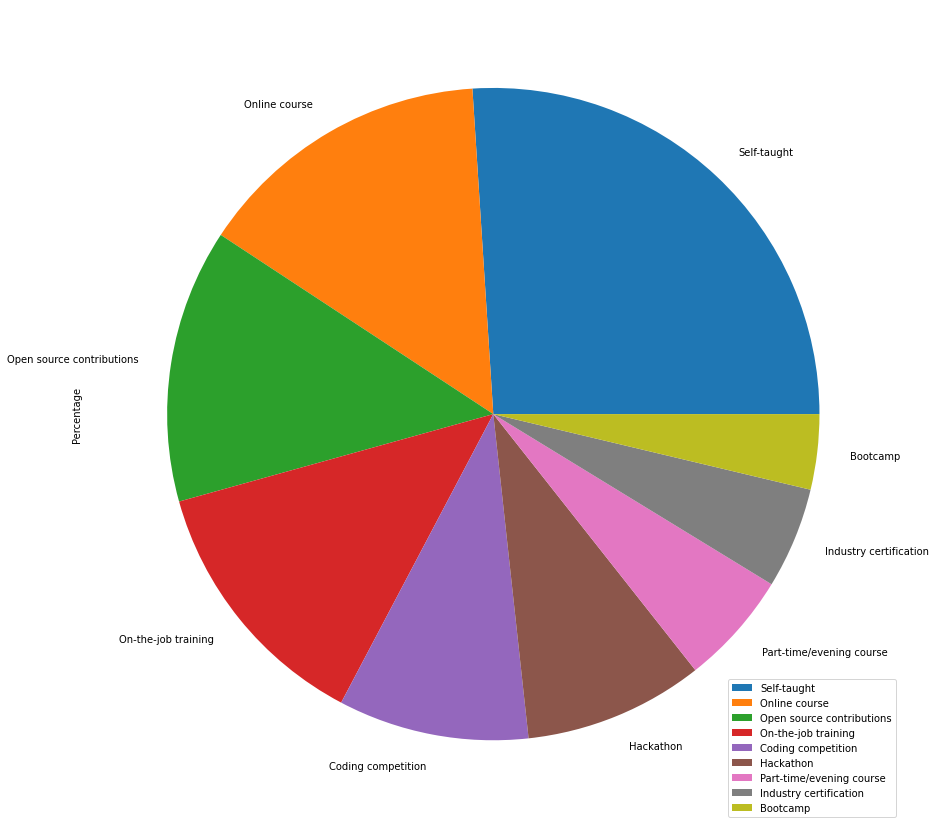

In [280]:
plot = new_df2.plot.pie(y = 'Percentage', figsize = (15,15), labels = new_df2.Developer);

<strong>Observations</strong><br>
new_df2 shows that most of the Data Scientists are either Self-taught or through online courses. Bootcamp and Industry certification are at the bottom, which implies that the best way to learn is by taking self initiative and starting an online course or doing it yourself.<br><br>

In [244]:
only_DS

,DeveloperType,JobSatisfaction,CareerSatisfaction,EducationTypes,HaveWorkedLanguage,HaveWorkedDatabase,HaveWorkedPlatform,FormalEducation,MajorUndergrad
0,Data scientist; Other,8.0,8.0,On-the-job training; Self-taught,Perl; Python,MySQL,NaN,Doctoral degree,A natural science
1,Web developer; Mobile developer; Data scientis...,NaN,7.0,Online course; Industry certification; On-the-...,C++; C#; Java; JavaScript; Python; Ruby; SQL; ...,MongoDB; SQL Server; MySQL; PostgreSQL; Oracle...,Android; Linux Desktop; Amazon Web Services (AWS),Master's degree,Something else
2,Web developer; Mobile developer; Data scientis...,8.0,7.0,NaN,C++; C#; JavaScript; SQL,SQL Server,Windows Phone; Windows Desktop; Microsoft Azure,Bachelor's degree,Fine arts or performing arts
3,Machine learning specialist; Developer with a ...,NaN,4.0,On-the-job training; Self-taught; Coding compe...,CoffeeScript; Haskell; JavaScript; Python; SQL,MongoDB; Redis; PostgreSQL,Windows Desktop; Linux Desktop; Amazon Web Ser...,Master's degree,Computer science or software engineering
4,Web developer; Mobile developer; Data scientis...,5.0,9.0,NaN,CoffeeScript; JavaScript; Objective-C; PHP; Py...,Redis; MySQL,iOS; Mac OS; Arduino; Raspberry Pi; Amazon Web...,Primary/elementary school,NaN
...,...,...,...,...,...,...,...,...,...
3040,Data scientist; Desktop applications developer,8.0,9.0,NaN,C++; Java,MongoDB; PostgreSQL; Oracle,NaN,Master's degree,Computer engineering or electrical/electronics...
3041,Web developer; Data scientist; Quality assuran...,7.0,7.0,On-the-job training; Self-taught; Coding compe...,Assembly; Clojure; JavaScript; Python; Scala; SQL,MongoDB; MySQL; SQLite,NaN,Secondary school,NaN
3042,Machine learning specialist; Developer with a ...,5.0,8.0,Self-taught,C++,NaN,Windows Desktop,Doctoral degree,A non-computer-focused engineering discipline
3043,Web developer; Mobile developer; Embedded appl...,0.0,0.0,Bootcamp; Part-time/evening course; Industry c...,NaN,NaN,NaN,Doctoral degree,Something else


<AxesSubplot:>

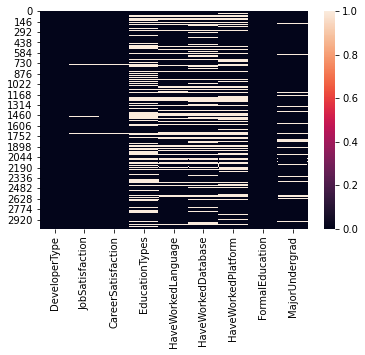

In [245]:
sns.heatmap(only_DS.isnull()) #Seeing the null values. EducationTypes and HaveWorkedPlatform have th highest number of nulls

<strong>1.Dropping all null values</strong> 

In [246]:
only_DS1 = only_DS.dropna(axis = 0)
only_DS1

,DeveloperType,JobSatisfaction,CareerSatisfaction,EducationTypes,HaveWorkedLanguage,HaveWorkedDatabase,HaveWorkedPlatform,FormalEducation,MajorUndergrad
8,Web developer; Graphics programming; Developer...,4.0,5.0,Self-taught; Coding competition; Hackathon; Op...,C++; C#; F#; Haskell; Python; SQL,SQL Server,Windows Desktop; Arduino; Raspberry Pi,Bachelor's degree,Computer science or software engineering
9,Machine learning specialist; Data scientist,10.0,10.0,Self-taught,C#; Java; JavaScript; Python; Scala; SQL; VBA,Redis; SQL Server,Amazon Web Services (AWS); Microsoft Azure,Some college/university study without earning ...,Computer science or software engineering
11,Web developer; Machine learning specialist; Da...,7.0,8.0,Online course; Part-time/evening course; Indus...,C#; Java; JavaScript; Python; Scala; SQL; Type...,MongoDB; SQL Server; MySQL,Amazon Web Services (AWS); Microsoft Azure,Master's degree,Computer science or software engineering
12,Web developer; Embedded applications/devices d...,5.0,5.0,Industry certification; Self-taught; Coding co...,Java; JavaScript; Python; SQL,PostgreSQL,Android; Raspberry Pi; Amazon Web Services (AWS),Master's degree,A non-computer-focused engineering discipline
13,Graphics programming; Developer with a statist...,10.0,10.0,On-the-job training; Self-taught,C++; Matlab; Python; R; VBA,MySQL; SQLite,Windows Desktop; Linux Desktop,Master's degree,A non-computer-focused engineering discipline
...,...,...,...,...,...,...,...,...,...
3036,Web developer; Mobile developer; Developer wit...,8.0,8.0,Industry certification; Self-taught; Open sour...,Java; PHP; SQL,MySQL,Android; Windows Desktop; Linux Desktop,Master's degree,Computer science or software engineering
3037,Web developer; Mobile developer; Data scientis...,9.0,10.0,Online course; On-the-job training; Self-taugh...,JavaScript; PHP; SQL,MongoDB; SQL Server; MySQL; PostgreSQL; SQLite,Android; Linux Desktop; Arduino; Serverless; A...,Bachelor's degree,Computer science or software engineering
3038,Machine learning specialist; Data scientist; D...,9.0,8.0,Part-time/evening course; Self-taught,Groovy; JavaScript; Scala; SQL,SQL Server; MySQL; PostgreSQL; Oracle,Windows Desktop; Linux Desktop,Master's degree,Computer science or software engineering
3039,Web developer; Data scientist; Database admini...,7.0,9.0,Self-taught,C++; Java; JavaScript; SQL,MySQL; PostgreSQL,Windows Desktop; Linux Desktop,Bachelor's degree,A non-computer-focused engineering discipline
